# Credit Risk Analysis: Identifying Risky Loan Applicants
<br>

## Introduction
Lending money to applicants who might not repay it is a major cause of financial loss, known as credit loss. Credit loss means the money a lender loses when borrowers don't pay back their loans or run away without repaying.

Our main goal here is to find these risky loan applicants effectively. This will help us reduce such loans and lower the overall credit loss. We'll use a method called Exploratory Data Analysis (EDA) to identify these applicants, and that's the main focus of this case study.

## Objective
This analysis is all about finding out what factors make loans go bad. We call these factors 'driver variables' because they strongly indicate the risk of a loan not being repaid. The company can use this knowledge to improve how it manages its loans and assess the risk involved.

## Methodology
The following steps outline the process:

__Data Cleaning:__ In this initial step, the data will be cleaned and prepared for analysis, ensuring that it is accurate and free from inconsistencies.<br>

__Univariate Analysis:__ This step involves examining individual variables one at a time to gain insights into their distributions and characteristics.<br>

__Segmented Univariate Analysis:__ Here, the focus shifts to studying variable segments, helping identify patterns within specific groups or categories.<br>

__Bivariate/Multivariate Analysis:__ This step explores relationships between variables, including how multiple factors may influence loan default.<br>

__Results:__ The final step presents the findings and conclusions drawn from the analysis, providing actionable insights for the company's portfolio and risk assessment strategies.


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
#Read data from the CSV file
loan = pd.read_csv(r"C:\Users\saumy\Desktop\UpGrad_Proj\loan\loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Cleanup of Data

## First Step is to cleanup the data. 
This involves removal of null/NA columns, fixing columns with missing data, and removing unnecessary data.

In [3]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [4]:
#first we would try to remove null/NA columns

loan.dropna(axis = 1, how = 'all', inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [5]:
#Check the percentage of null values in each column
(loan.isnull().sum()/loan.shape[0] * 100).sort_values()

id                             0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
policy_code                    0.000000
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
addr_state                     0.000000
last_pymnt_amnt                0.000000
initial_list_status            0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
total_acc                      0.000000
recoveries                     0.000000
zip_code                       0.000000
purpose                        0.000000
member_id                      0.000000
loan_amnt                      0.000000


In [6]:
# we can remove the columns with missing percentage over 40%
loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis = 1, inplace = True)
loan.shape

(39717, 54)

In [7]:
#Analyze the following non-null columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [8]:
loan.fillna(0)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
# We can drop the columns with unique value 1 
column_unique = loan.nunique()
column_unique

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [10]:
#We can drop the columns with unique value 1 
column_unique.values[0:-1]
loan.drop(columns = list(column_unique[column_unique.values == 1].index), inplace=True)
loan.shape

(39717, 45)

In [11]:
#The company wants to know which loan applications are risky. Therefore, the fields that are created after a loan application is approved doesn't make sense for our analysis towards the business objective. Secondly, fields like id, member_id & url are different for each application. zip_code could have been a useful driver, but it contains only partial data which might impute our analysis negatively. Therefore, let us drop all these columns mentioned below
loan.drop(columns=["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d", 'desc', 'title'], inplace=True)

In [12]:
loan.shape

(39717, 27)

In [13]:
#We can drop the column emp_title as the null values are more and we do not want the analysis to be done based on the names.
loan.drop('emp_title', axis = 1, inplace = True)

In [14]:
# for the remaining null cells, we could remove the rows in order to make our analysis easy.
loan.dropna(subset = ['emp_length', 'revol_util','pub_rec_bankruptcies'], axis = 0, inplace=True)
loan.shape

(37898, 26)

In [15]:
loan.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [16]:
loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [17]:
# we can remove the on-going loan details as it will be difficult to say if they default or not
loan = loan[loan['loan_status'] != 'Current']
loan.shape

(36800, 26)

# Manipulating Data

## Next step is to convert the data into a readable or into a numerical value

In [18]:
# check the datatype for each column 
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [19]:
# The column interest rate has % sign and therefore the datatype is not correct
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['int_rate'].describe()

count    36800.000000
mean        11.983745
std          3.701182
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [20]:
# The column Issue_d is of Date but listed as Object
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')

In [21]:
loan.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                      object
total_acc                        int64
pub_rec_bankruptcies     

## Removal of Outliners

<AxesSubplot:>

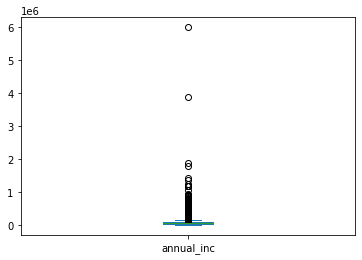

In [22]:
# the rows with very high income can afford to repay the loan, so, would remove the top layer
loan['annual_inc'].plot.box()

In [23]:
loan['annual_inc'].describe()

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

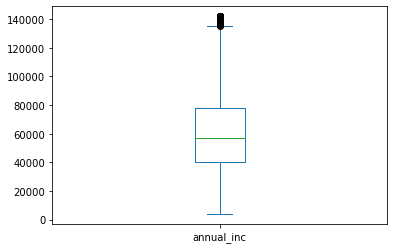

In [24]:
# the standard deviation is too high in this case and hence the need to remove the outliners
topLayer = loan['annual_inc'].quantile(0.95)
loan = loan[loan['annual_inc'] <= topLayer]
loan['annual_inc'].plot.box()

In [25]:
loan.shape

(34972, 26)

# Deriving Variables

##### This section is about creating new columns from existing data.

In [26]:
# We can bin some quantitative data into groups to analyse the data more efficiently.

# Loan Amount
loan['loan_amnt'].describe()

count    34972.000000
mean     10778.632906
std       7067.550179
min        500.000000
25%       5125.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [27]:
loan['grp_loan_amnt'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels = ['0-7000', '7000-14000', '14000-21000', '21000-28000', 'Above 28000'])


In [28]:
# DTI
loan['dti'].describe()

count    34972.000000
mean        13.505695
std          6.640919
min          0.000000
25%          8.420000
50%         13.640000
75%         18.750000
max         29.990000
Name: dti, dtype: float64

In [29]:
loan['grp_dti'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25, 30], labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])


In [30]:
# Annual Income
loan['annual_inc'].describe()

count     34972.000000
mean      61568.490416
std       27750.430788
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64

In [31]:
loan['grp_annual_inc'] = pd.cut(loan['annual_inc'], [0, 30000, 60000, 90000, 120000, 150000], labels = ['0-30000', '30000-60000', '60000-90000', '90000-120000', '120000+'])


In [32]:
# Interest Rate
loan['int_rate'].describe()

count    34972.00000
mean        11.93821
std          3.67680
min          5.42000
25%          8.94000
50%         11.83000
75%         14.42000
max         24.40000
Name: int_rate, dtype: float64

In [33]:
loan['grp_int_rate'] = pd.cut(loan['int_rate'], [0, 5, 10, 15, 20, 25], labels = ['0-5', '5-10', '10-15', '15-20', '20+'])


In [34]:
# Splitting Month and Year into different columns
loan["year_of_issue"] = loan['issue_d'].dt.year
loan['month_of_issue'] = loan['issue_d'].dt.strftime('%b')
loan.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,grp_loan_amnt,grp_dti,grp_annual_inc,grp_int_rate,year_of_issue,month_of_issue
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,13648,83.70%,9,0.0,0-7000,25-30,0-30000,10-15,2011,Dec
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1687,9.40%,4,0.0,0-7000,0-5,0-30000,15-20,2011,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2956,98.50%,10,0.0,0-7000,5-10,0-30000,15-20,2011,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,5598,21%,37,0.0,7000-14000,15-20,30000-60000,10-15,2011,Dec
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,7963,28.30%,12,0.0,0-7000,10-15,30000-60000,5-10,2011,Dec


# Univariate Analysis

### Quantitative analysis

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

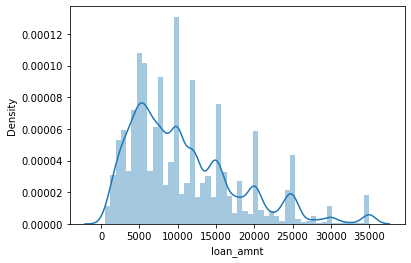

In [35]:
# Comparing loan amount, funded amount and investor funded amount

sns.distplot(loan['loan_amnt'])

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

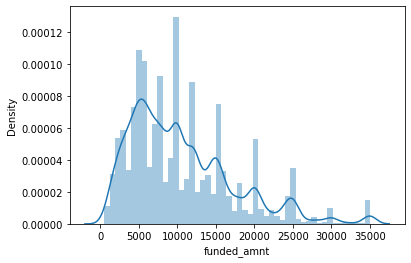

In [36]:
sns.distplot(loan['funded_amnt'])

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Density'>

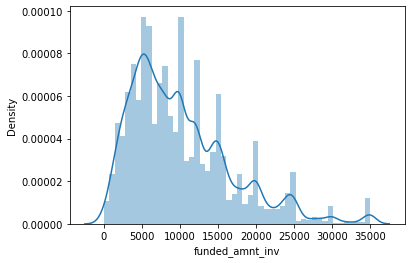

In [37]:
sns.distplot(loan['funded_amnt_inv'])

The plots look almost the same, we can opt for one for further analysis. We would use 'loan amount' for further analysis.

<AxesSubplot:xlabel='loan_amnt'>

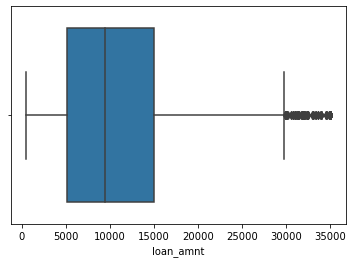

In [38]:
sns.boxplot(loan['loan_amnt'])

__OBSERVATION:__<br>
It can be deduced that most of the loan are in the range 5000 to 15000.

<AxesSubplot:xlabel='int_rate'>

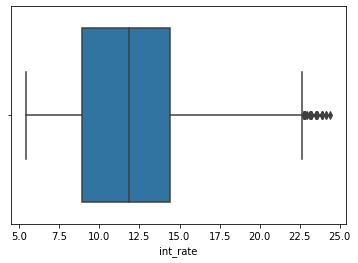

In [39]:
sns.boxplot(loan['int_rate'])

__OBSERVATION:__<br> It can be deduced that most of the interest rate on the loan is between 8.5% and 14.5%

<AxesSubplot:xlabel='annual_inc'>

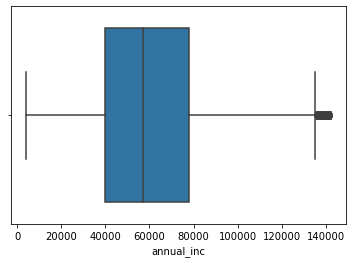

In [40]:
sns.boxplot(loan['annual_inc'])

__OBSERVATION:__<br> It can be seen that most of the income ranges from 40000 to approximately 80000

<AxesSubplot:xlabel='index', ylabel='year_of_issue'>

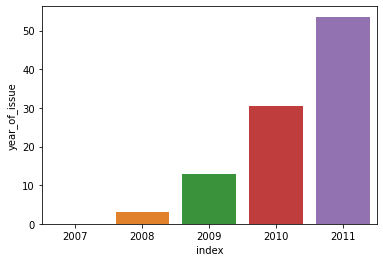

In [41]:
#converting value_count into percentage
year_percentage = loan["year_of_issue"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
sns.barplot(data=year_percentage, x="index", y="year_of_issue")


__OBSERVATION:__<br> It can be seen that as the loan amount disbursal has increased over the years

<AxesSubplot:xlabel='index', ylabel='month_of_issue'>

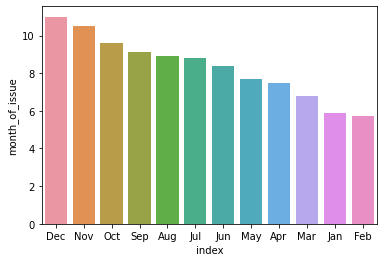

In [42]:
#converting value_count into percentage
month_percentage = loan["month_of_issue"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
sns.barplot(data=month_percentage, x="index", y="month_of_issue")

__OBSERVATION:__<br> It can be seen that the loan disbursal increases as the year end approaches. Maybe to achieve loan targets, or due to festive mood.

## Categorical Variables Analysis

<AxesSubplot:xlabel='index', ylabel='loan_status'>

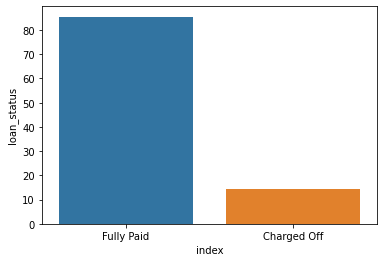

In [43]:
#Loan status analysis
ls = loan["loan_status"].value_counts(normalize=True).mul(100).round(1).reset_index()
sns.barplot(data=ls, x="index", y="loan_status")

In [44]:
full_paid_percent = round(100 * loan['loan_status'].value_counts()[0] / loan['loan_status'].count(), 2)
full_paid_percent

85.51

In [45]:
charged_off_percent = round(100 * loan['loan_status'].value_counts()[1] / loan['loan_status'].count(), 2)
charged_off_percent

14.49

__OBSERVATION:__<br> 85.5% have fully paid the loan, and 14.5% have been charged off.

B    10606
A     9144
C     7137
D     4612
E     2363
F      852
G      258
Name: grade, dtype: int64


<AxesSubplot:xlabel='index', ylabel='grade'>

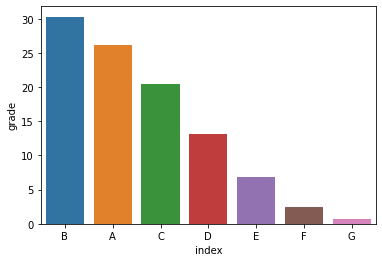

In [46]:
# analyzing Grade:

print(loan['grade'].value_counts())
grade_percentage = loan["grade"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
sns.barplot(data=grade_percentage, x="index", y="grade")


__OBSERVATION:__<br> Most of the loan is by group B.

10+ years    7780
< 1 year     4159
2 years      4024
3 years      3767
4 years      3153
5 years      3012
1 year       2953
6 years      2043
7 years      1619
8 years      1321
9 years      1141
Name: emp_length, dtype: int64


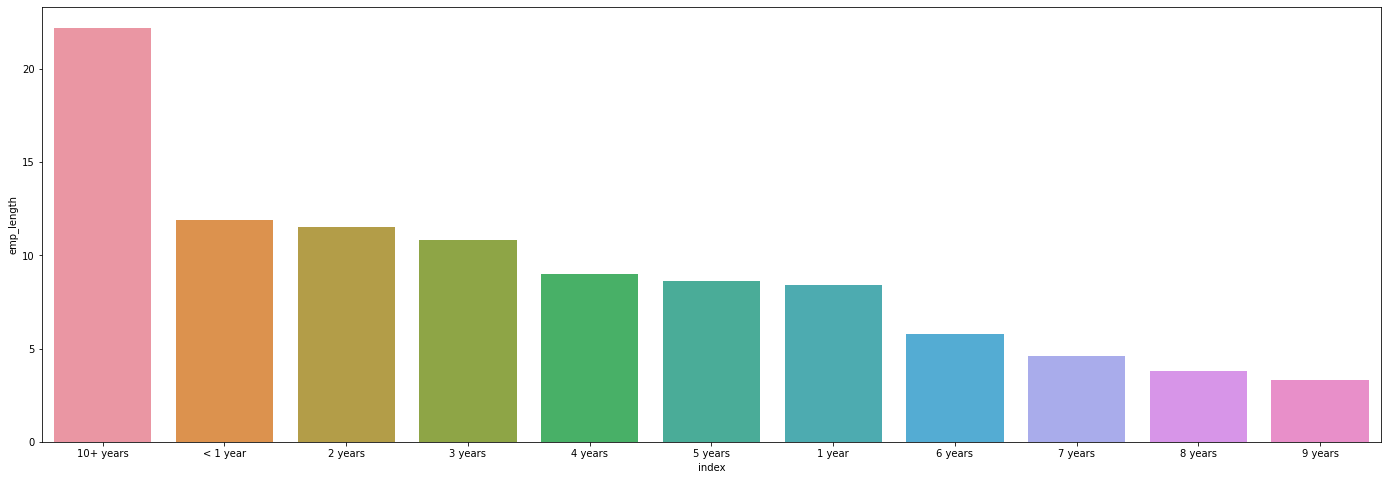

In [47]:
# Analyzing Employment Length

print(loan['emp_length'].value_counts())
emp_length_percentage = loan["emp_length"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
plt.figure(figsize=(24,8))
sns.barplot(data=emp_length_percentage, x="index", y="emp_length")
plt.show()


__OBSERVATION:__<br> Most of the loan was by the ones who have been in employment for more than 10 years.

RENT        17236
MORTGAGE    15059
OWN          2586
OTHER          91
Name: home_ownership, dtype: int64


<AxesSubplot:xlabel='index', ylabel='home_ownership'>

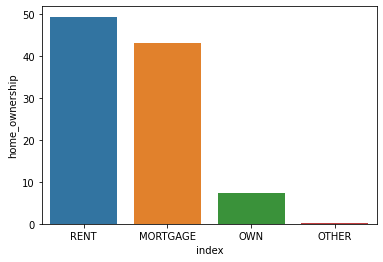

In [48]:
# Analyzing Employment Length

print(loan['home_ownership'].value_counts())
home_ownership_percentage = loan["home_ownership"].value_counts(normalize=True).mul(100).round(1).reset_index()
#barplot
sns.barplot(data=home_ownership_percentage, x="index", y="home_ownership")

__OBSERVATION:__<br> Borrowers who have rented home or mortgage have taken more loans compared to others.

Not Verified       15191
Verified           10805
Source Verified     8976
Name: verification_status, dtype: int64


<AxesSubplot:xlabel='index', ylabel='verification_status'>

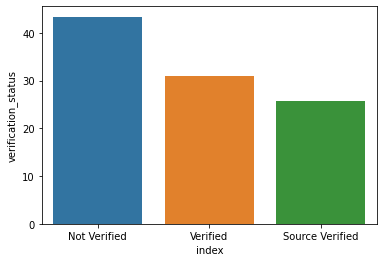

In [49]:
# Analyzing verification status

print(loan['verification_status'].value_counts())
verification_status_percentage = loan["verification_status"].value_counts(normalize = True).mul(100).round(1).reset_index()
#barplot
sns.barplot(data = verification_status_percentage, x = "index", y = "verification_status")

__OBSERVATION:__<br> Even though the number of Not Verified is highest, the difference is not much.

debt_consolidation    16646
credit_card            4567
other                  3436
home_improvement       2435
major_purchase         1956
small_business         1537
car                    1383
wedding                 864
medical                 609
moving                  516
vacation                331
house                   321
educational             284
renewable_energy         87
Name: purpose, dtype: int64


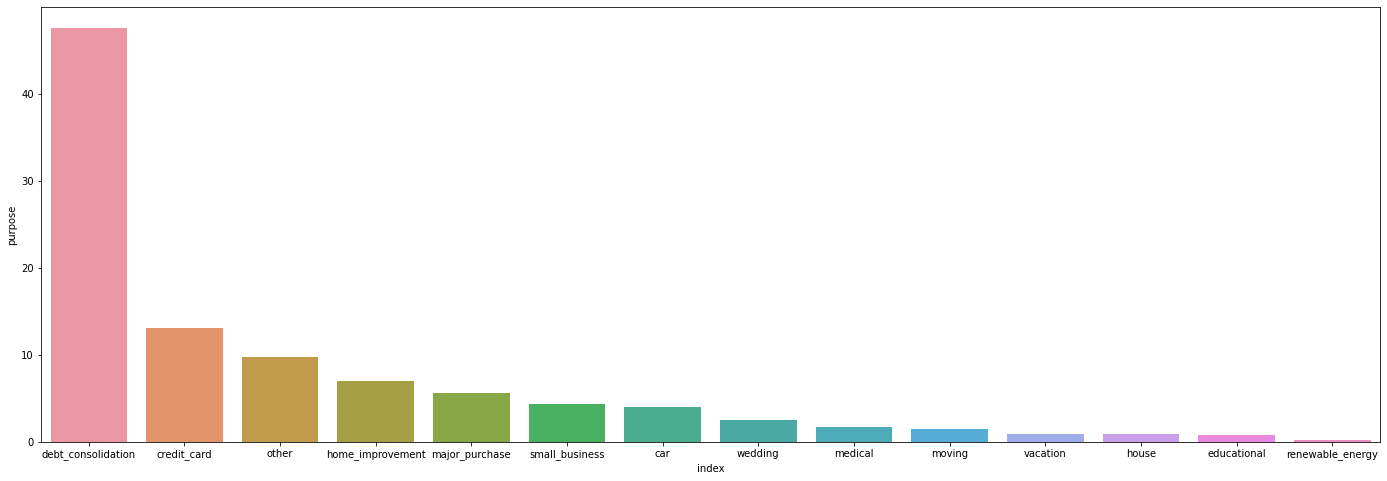

In [50]:
# Analyzing purpose

print(loan['purpose'].value_counts())
purpose_percentage = loan["purpose"].value_counts(normalize = True).mul(100).round(1).reset_index()
#barplot
plt.figure(figsize=(24,8))
sns.barplot(data = purpose_percentage, x = "index", y = "purpose")
plt.show()

__OBSERVATION:__<br> Majority of the bad loan is used for debt consolidation

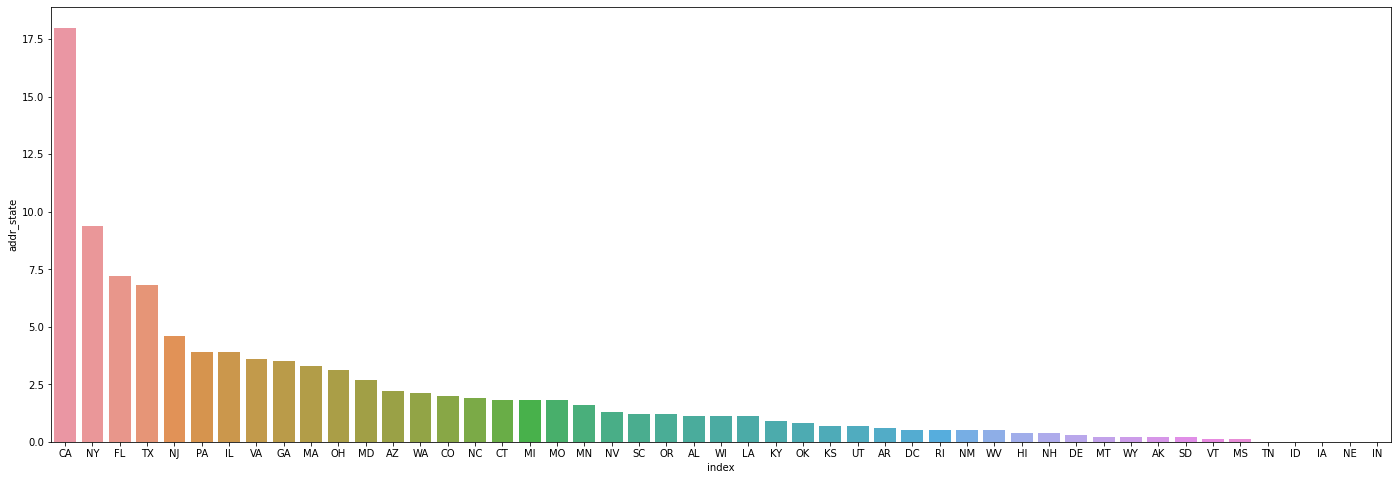

In [51]:
# Analyzing purpose

addr_state_percentage = loan["addr_state"].value_counts(normalize = True).mul(100).round(1).reset_index()
#barplot
plt.figure(figsize=(24,8))
sns.barplot(data = addr_state_percentage, x = "index", y = "addr_state")
plt.show()

__OBSERVATION:__<br>Major chunk of the bad loan is from the states CA, NY, FL, TX and NJ.

0.0    33473
1.0     1494
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


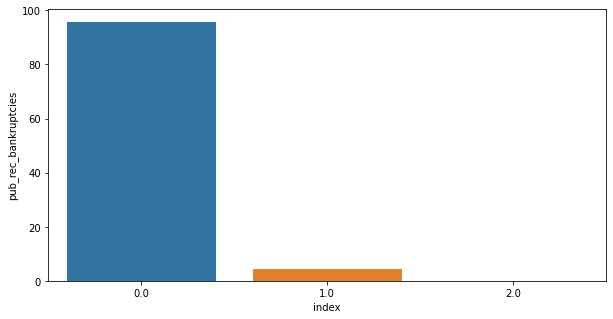

In [52]:
# Analyzing purpose

print(loan['pub_rec_bankruptcies'].value_counts())
pub_rec_bankruptcies_percentage = loan["pub_rec_bankruptcies"].value_counts(normalize = True).mul(100).round(1).reset_index()
#barplot
plt.figure(figsize=(10,5))
sns.barplot(data = pub_rec_bankruptcies_percentage, x = "index", y = "pub_rec_bankruptcies")
plt.show()

__OBSERVATION:__<br> The number of public record bankruptcies which is 0, is very high.

## Segmented Analysis

In [53]:
loan.groupby('grp_loan_amnt')['loan_status'].value_counts()

grp_loan_amnt  loan_status
0-7000         Fully Paid     11495
               Charged Off     1701
7000-14000     Fully Paid     10664
               Charged Off     1648
14000-21000    Fully Paid      5268
               Charged Off     1052
21000-28000    Fully Paid      1846
               Charged Off      452
Above 28000    Fully Paid       630
               Charged Off      216
Name: loan_status, dtype: int64

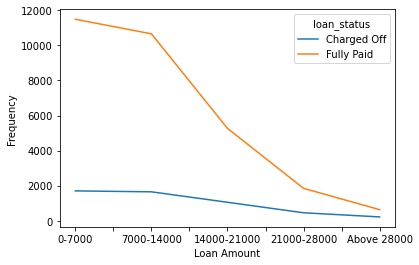

In [54]:
loan.groupby('grp_loan_amnt')['loan_status'].value_counts().unstack().plot(kind='line')
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

__OBSERVATION:__<br> from the above chart, it can be observed that most loans which were charged off are under 21000.

In [55]:
loan.groupby('grp_annual_inc')['loan_status'].value_counts()

grp_annual_inc  loan_status
0-30000         Fully Paid      3316
                Charged Off      729
30000-60000     Fully Paid     13170
                Charged Off     2485
60000-90000     Fully Paid      8546
                Charged Off     1267
90000-120000    Fully Paid      3765
                Charged Off      447
120000+         Fully Paid      1106
                Charged Off      141
Name: loan_status, dtype: int64

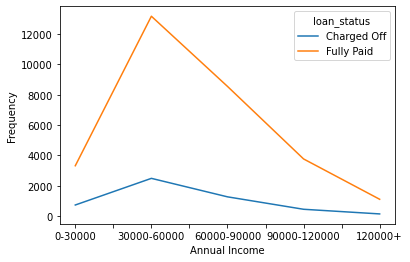

In [56]:
loan.groupby('grp_annual_inc')['loan_status'].value_counts().unstack().plot(kind='line')
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

__OBSERVATION:__<br> Most borrowers have annual income in the range 30000-60000

In [57]:
loan.groupby('grp_dti')['loan_status'].value_counts()

grp_dti  loan_status
0-5      Fully Paid     3646
         Charged Off     523
5-10     Fully Paid     6027
         Charged Off     877
10-15    Fully Paid     7515
         Charged Off    1265
15-20    Fully Paid     6912
         Charged Off    1267
20-25    Fully Paid     5178
         Charged Off    1035
25-30    Fully Paid      509
         Charged Off      79
Name: loan_status, dtype: int64

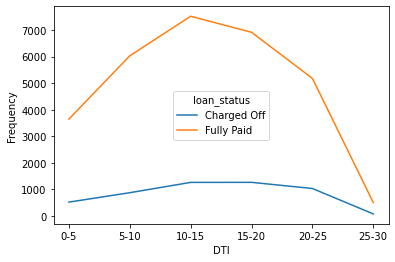

In [58]:
loan.groupby('grp_dti')['loan_status'].value_counts().unstack().plot(kind='line')
plt.xlabel("DTI")
plt.ylabel("Frequency")
plt.show()

__OBSERVATION:__<br> The most charged off loans have a DTI between 10 and 25

## Bivariate Analysis

Analyzing _loan amount_ with every variable

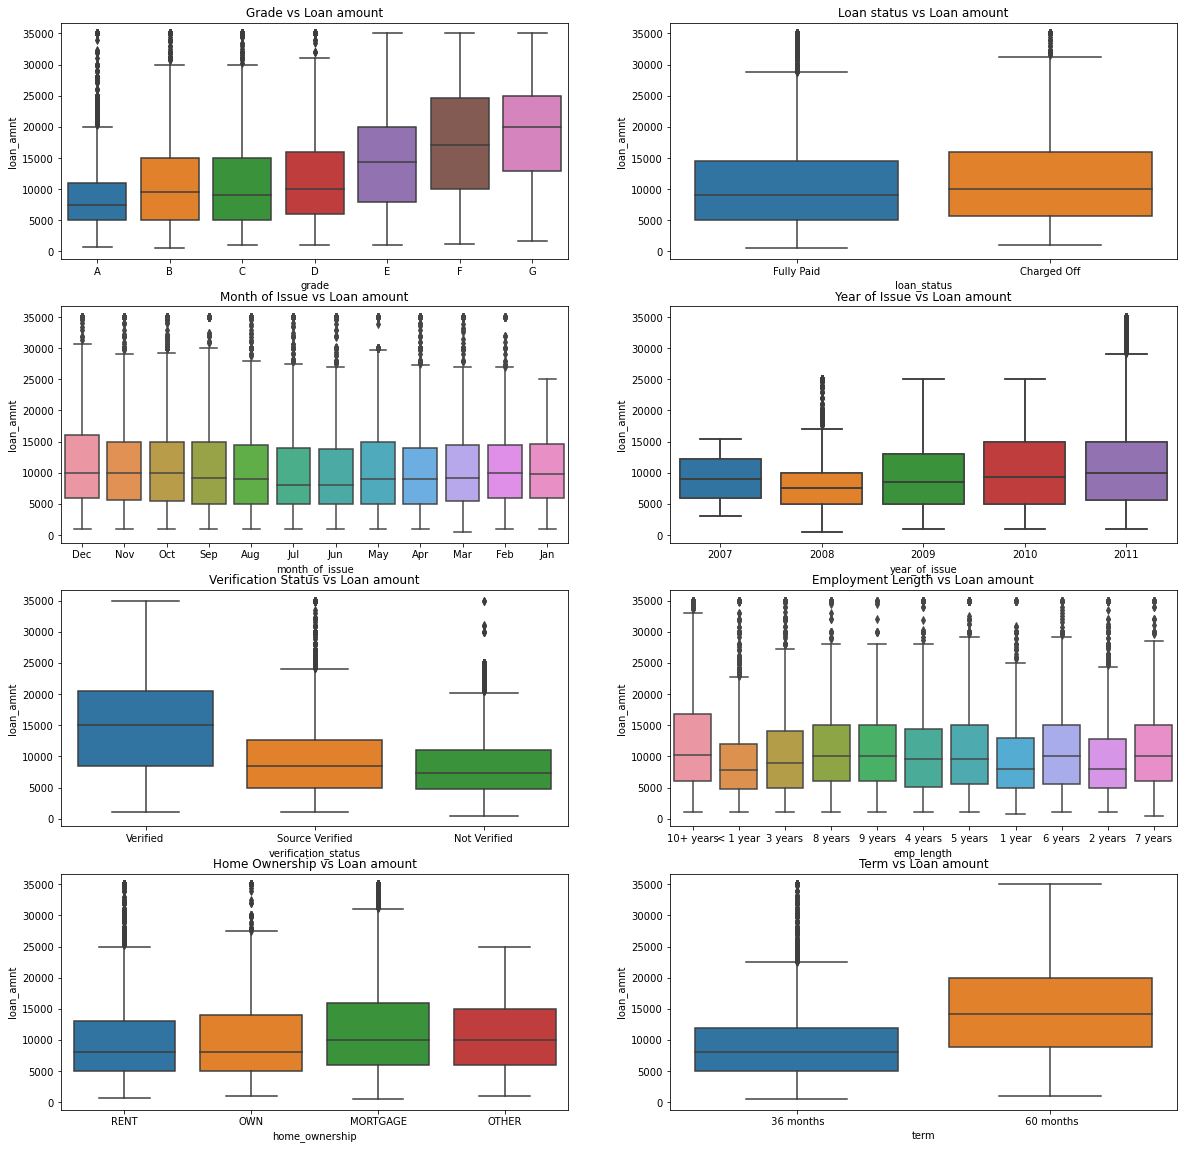

In [59]:
#comparing grade with the loan amount
#arranging grade in alphabetically ascending order
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
grade_unique = loan["grade"].unique()
grade_unique.sort()
sns.boxplot(x="grade", y="loan_amnt", order = grade_unique, data=loan)
plt.title("Grade vs Loan amount")

#comparing loan status with the loan amount
plt.subplot(4,2,2)
sns.boxplot(x="loan_status", y="loan_amnt", data=loan)
plt.title("Loan status vs Loan amount")

#comparing month of Issue with the loan amount
plt.subplot(4,2,3)
sns.boxplot(x="month_of_issue", y="loan_amnt", data=loan)
plt.title("Month of Issue vs Loan amount")

#comparing year of Issue with the loan amount
plt.subplot(4,2,4)
sns.boxplot(x="year_of_issue", y="loan_amnt", data=loan)
plt.title("Year of Issue vs Loan amount")

#comparing year of Issue with the loan amount
plt.subplot(4,2,4)
sns.boxplot(x="year_of_issue", y="loan_amnt", data=loan)
plt.title("Year of Issue vs Loan amount")

#comparing verification status with the loan amount
plt.subplot(4,2,5)
sns.boxplot(x="verification_status", y="loan_amnt", data=loan)
plt.title("Verification Status vs Loan amount")

#comparing employment length with the loan amount
plt.subplot(4,2,6)
sns.boxplot(x="emp_length", y="loan_amnt", data=loan)
plt.title("Employment Length vs Loan amount")

#comparing home ownership with the loan amount
plt.subplot(4,2,7)
sns.boxplot(x="home_ownership", y="loan_amnt", data=loan)
plt.title("Home Ownership vs Loan amount")

#comparing term with the loan amount
plt.subplot(4,2,8)
sns.boxplot(x="term", y="loan_amnt", data=loan)
plt.title("Term vs Loan amount")

plt.show()

__OBSERVATIONS:__<br>
    - The Grades G, F and E have higher loan amount.<br>
    - The loan amount has almost remained same through the years 2007 to 2011.<br>
    - The _Verified_ borrowers have more loan amount than _Source Verified_ and _Not Verified_.<br>
    - The loan amount almost remains same throughout a year (over the months).<br>
    - The Employment length of 10+ years have most loan amount. However, the average is same for almost all the employment length.<br>
    - Home Ownership does not have much effect on the loan amount, and it almost remains same throughout.<br>
    - Borrowers who are taking loan for 60 months are taking more loan amount, than with 36 months.

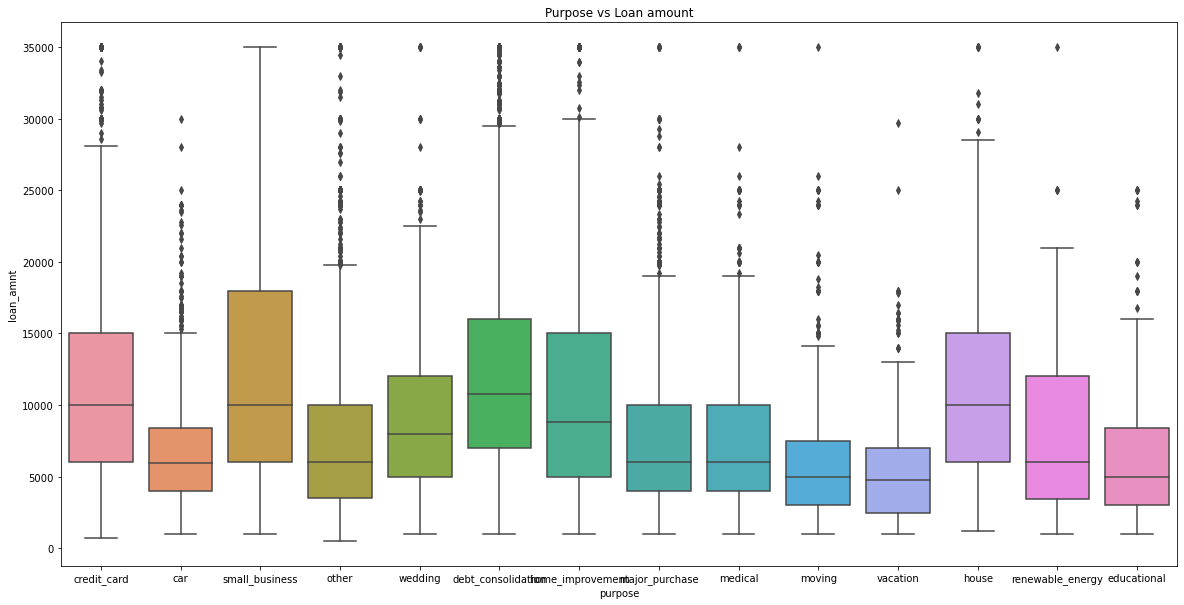

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(x="purpose", y="loan_amnt", data=loan)
plt.title("Purpose vs Loan amount")
plt.show()


__OBSERVATION:__<br>
Highest loan amount is needed by the small business. However, there are others purposes like house, credit card and debt consolidation which are high as well.

Analyzing _Annual Income_ with every variable

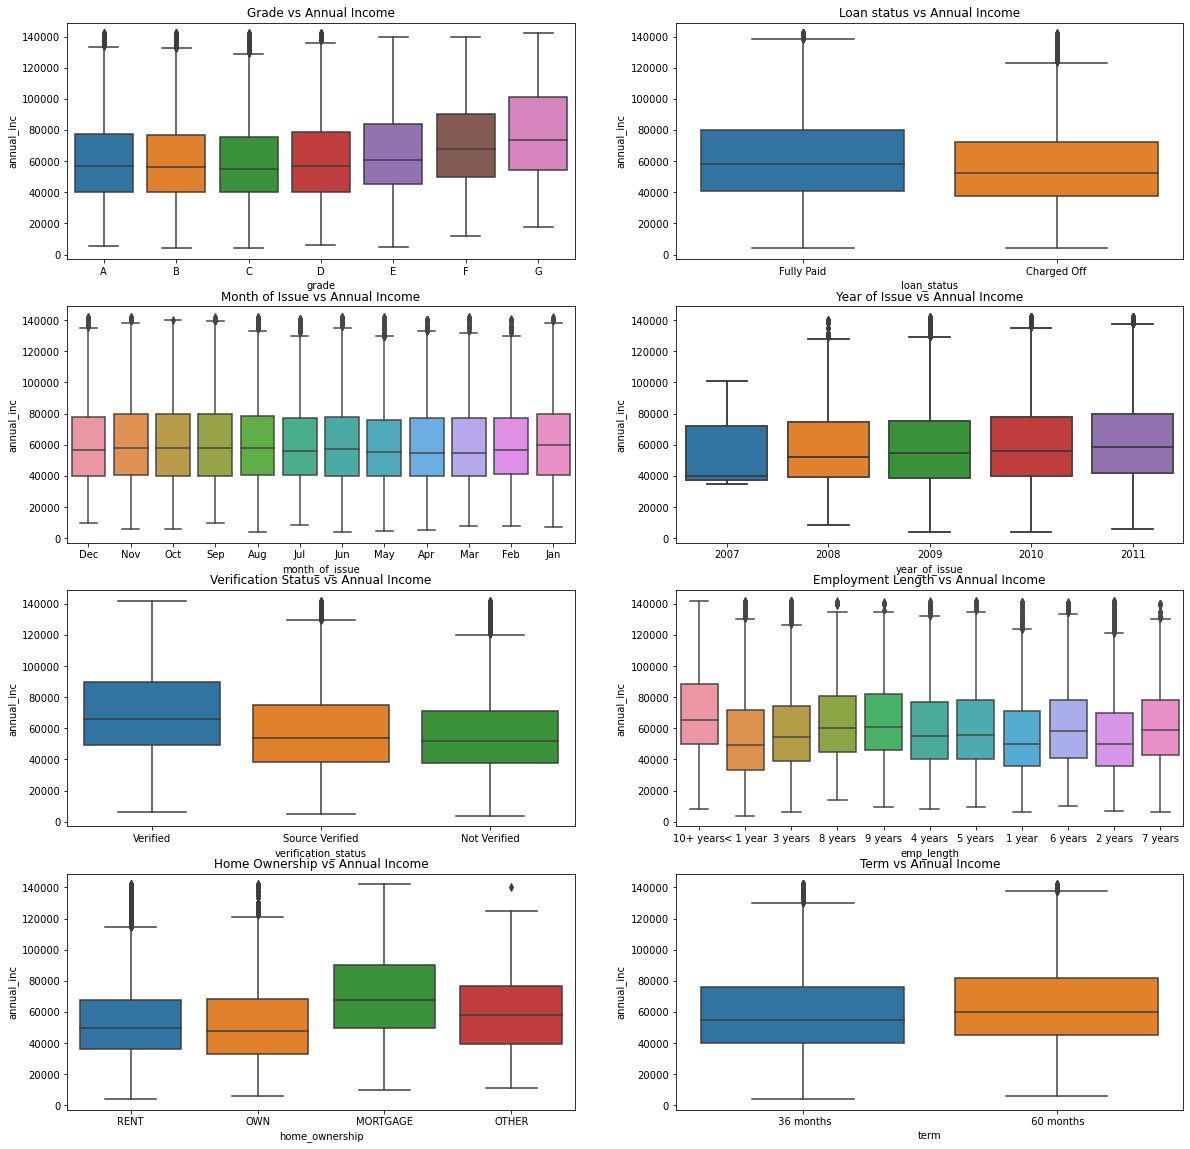

In [61]:
#comparing grade with the loan amount
#arranging grade in alphabetically ascending order
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
grade_unique = loan["grade"].unique()
grade_unique.sort()
sns.boxplot(x="grade", y="annual_inc", order = grade_unique, data=loan)
plt.title("Grade vs Annual Income")

#comparing loan status with the loan amount
plt.subplot(4,2,2)
sns.boxplot(x="loan_status", y="annual_inc", data=loan)
plt.title("Loan status vs Annual Income")

#comparing month of Issue with the loan amount
plt.subplot(4,2,3)
sns.boxplot(x="month_of_issue", y="annual_inc", data=loan)
plt.title("Month of Issue vs Annual Income")

#comparing year of Issue with the loan amount
plt.subplot(4,2,4)
sns.boxplot(x="year_of_issue", y="annual_inc", data=loan)
plt.title("Year of Issue vs Annual Income")

#comparing year of Issue with the loan amount
plt.subplot(4,2,4)
sns.boxplot(x="year_of_issue", y="annual_inc", data=loan)
plt.title("Year of Issue vs Annual Income")

#comparing verification status with the loan amount
plt.subplot(4,2,5)
sns.boxplot(x="verification_status", y="annual_inc", data=loan)
plt.title("Verification Status vs Annual Income")

#comparing employment length with the loan amount
plt.subplot(4,2,6)
sns.boxplot(x="emp_length", y="annual_inc", data=loan)
plt.title("Employment Length vs Annual Income")

#comparing home ownership with the loan amount
plt.subplot(4,2,7)
sns.boxplot(x="home_ownership", y="annual_inc", data=loan)
plt.title("Home Ownership vs Annual Income")

#comparing term with the loan amount
plt.subplot(4,2,8)
sns.boxplot(x="term", y="annual_inc", data=loan)
plt.title("Term vs Annual Income")

plt.show()

__OBSERVATIONS:__<br>
    - Grade G has the highest annual income.<br>
    - Fully paid loan borrowers have slightly higher income than charged off borrowers.<br>
    - Month and year have almost no effect on annual income.<br>
    - Verified borrowers have higher annual income compared to others.<br>
    - Annual income increases as employment duration increases.<br>
    - Borrowers with Home Ownership Mortgaged. have most annual income.<br>
    - Borrowers with 60 months loan period have slightly more annual income.

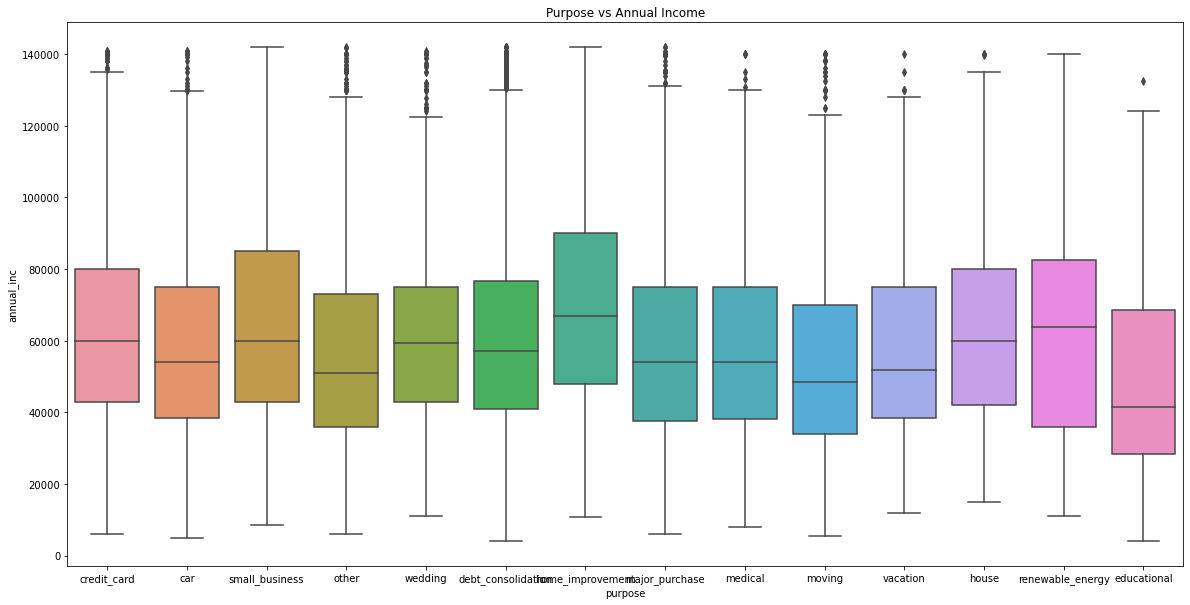

In [62]:
plt.figure(figsize=(20,10))
sns.boxplot(x="purpose", y="annual_inc", data=loan)
plt.title("Purpose vs Annual Income")
plt.show()

__OBSERVATION:__<br>
    Borrowers with purpose Home Improvement has higher income, Followed by Small Business. 

Analyzing _Interest Rate_ with every variable

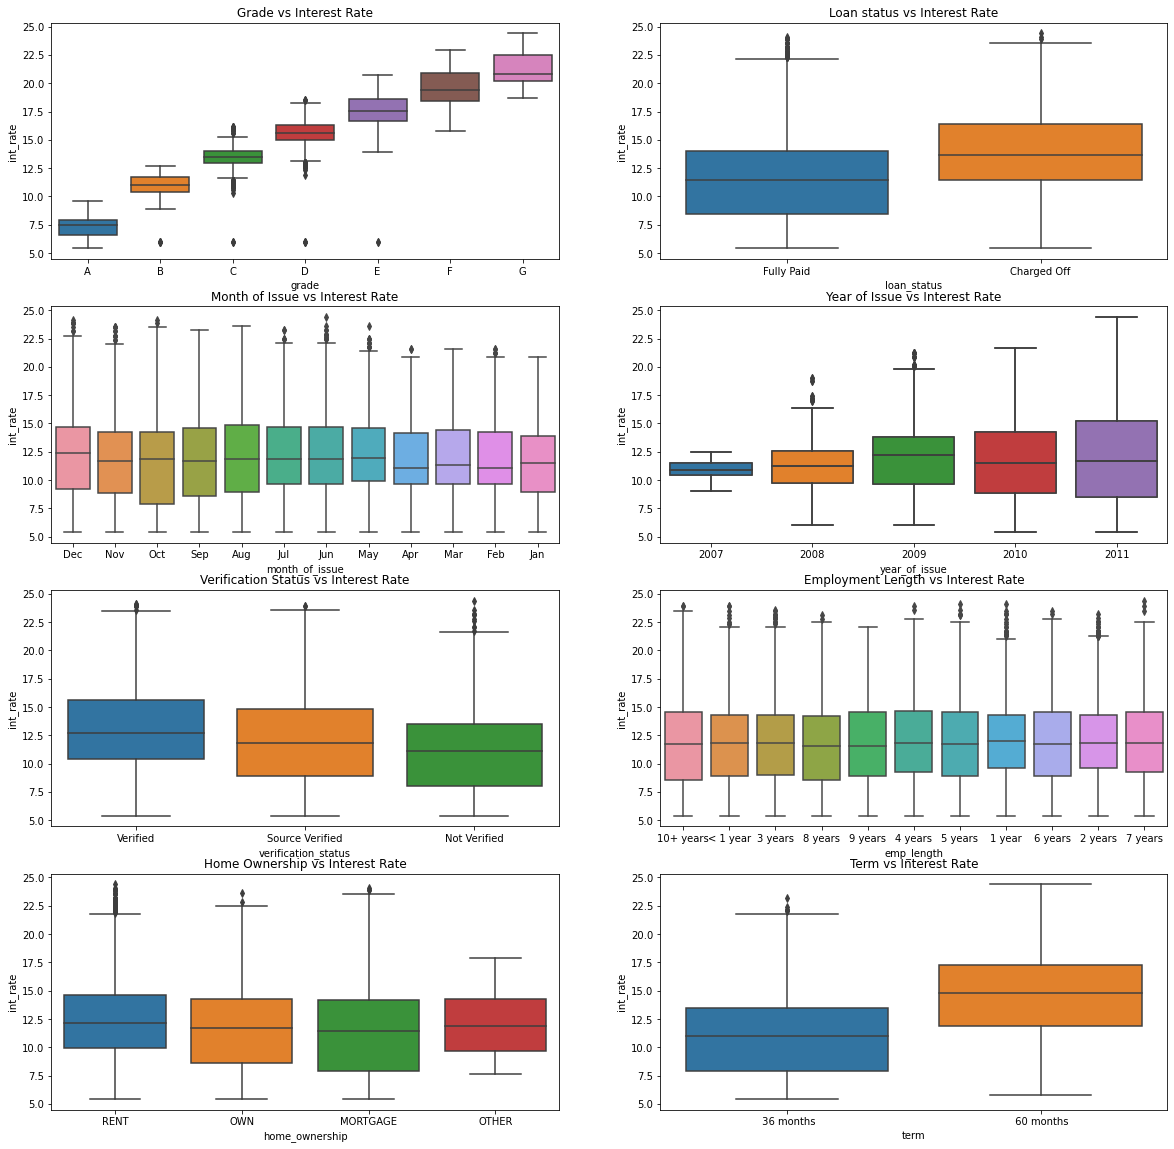

In [63]:
#comparing grade with the interest rate
#arranging grade in alphabetically ascending order
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
grade_unique = loan["grade"].unique()
grade_unique.sort()
sns.boxplot(x="grade", y="int_rate", order = grade_unique, data=loan)
plt.title("Grade vs Interest Rate")

#comparing loan status with the interest rate
plt.subplot(4,2,2)
sns.boxplot(x="loan_status", y="int_rate", data=loan)
plt.title("Loan status vs Interest Rate")

#comparing month of Issue with the interest rate
plt.subplot(4,2,3)
sns.boxplot(x="month_of_issue", y="int_rate", data=loan)
plt.title("Month of Issue vs Interest Rate")

#comparing year of Issue with the interest rate
plt.subplot(4,2,4)
sns.boxplot(x="year_of_issue", y="int_rate", data=loan)
plt.title("Year of Issue vs Interest Rate")

#comparing year of Issue with the interest rate
plt.subplot(4,2,4)
sns.boxplot(x="year_of_issue", y="int_rate", data=loan)
plt.title("Year of Issue vs Interest Rate")

#comparing verification status with the interest rate
plt.subplot(4,2,5)
sns.boxplot(x="verification_status", y="int_rate", data=loan)
plt.title("Verification Status vs Interest Rate")

#comparing employment length with the interest rate
plt.subplot(4,2,6)
sns.boxplot(x="emp_length", y="int_rate", data=loan)
plt.title("Employment Length vs Interest Rate")

#comparing home ownership with the interest rate
plt.subplot(4,2,7)
sns.boxplot(x="home_ownership", y="int_rate", data=loan)
plt.title("Home Ownership vs Interest Rate")

#comparing term with the interest rate
plt.subplot(4,2,8)
sns.boxplot(x="term", y="int_rate", data=loan)
plt.title("Term vs Interest Rate")

plt.show()

__OBSERVATIONS:__<br>
    - Grade G pays the highest interest rate and the rate then reduces as the grade reduces.<br>
    - Fully paid loan borrowers pay less interest than charged off borrowers.<br>
    - Month and employment length have almost no effect on annual income. (Median is almost the same)<br>
    - Verified borrowers have higher interest rate compared to others.<br>
    - As the year goes on, the interest range is becoming more diverse.<br>
    - Borrowers who are in rent have a higher interest rate. The borrower with own and mortgage home are getting loan with slightly less percentage.<br>
    - Borrowers with 60 months loan period have significantly higher interest rate.

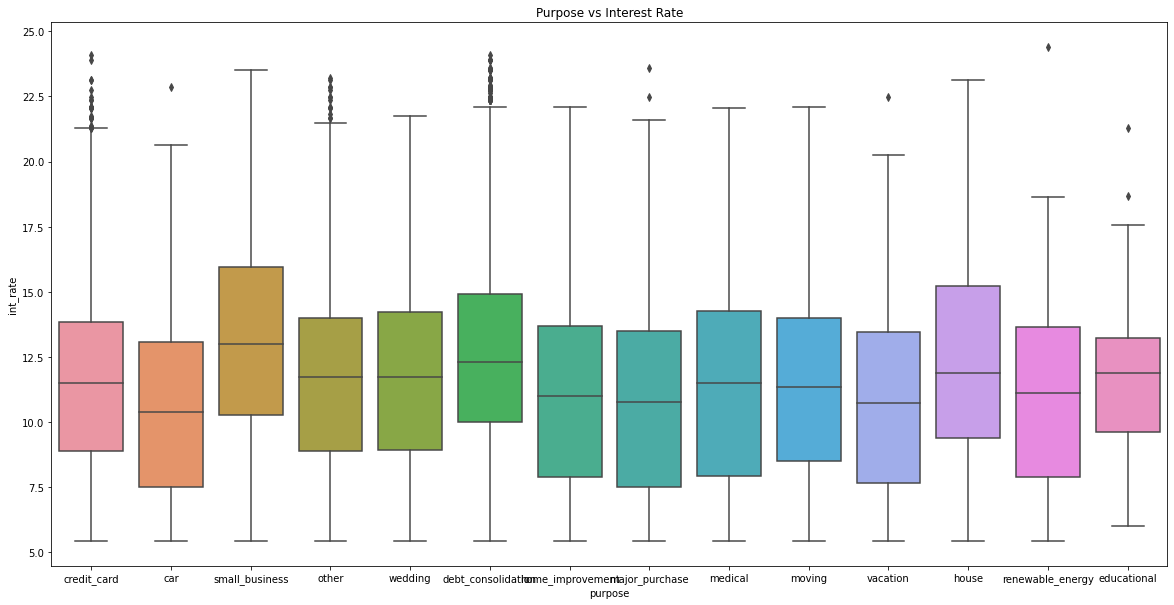

In [64]:
plt.figure(figsize=(20,10))
sns.boxplot(x="purpose", y="int_rate", data=loan)
plt.title("Purpose vs Interest Rate")
plt.show()

__OBSERVATION:__<br>
    Small business, Debt consolidation and House Loan are geting loan at high interest rate than others.

Analyzing _DTI_ with every variable

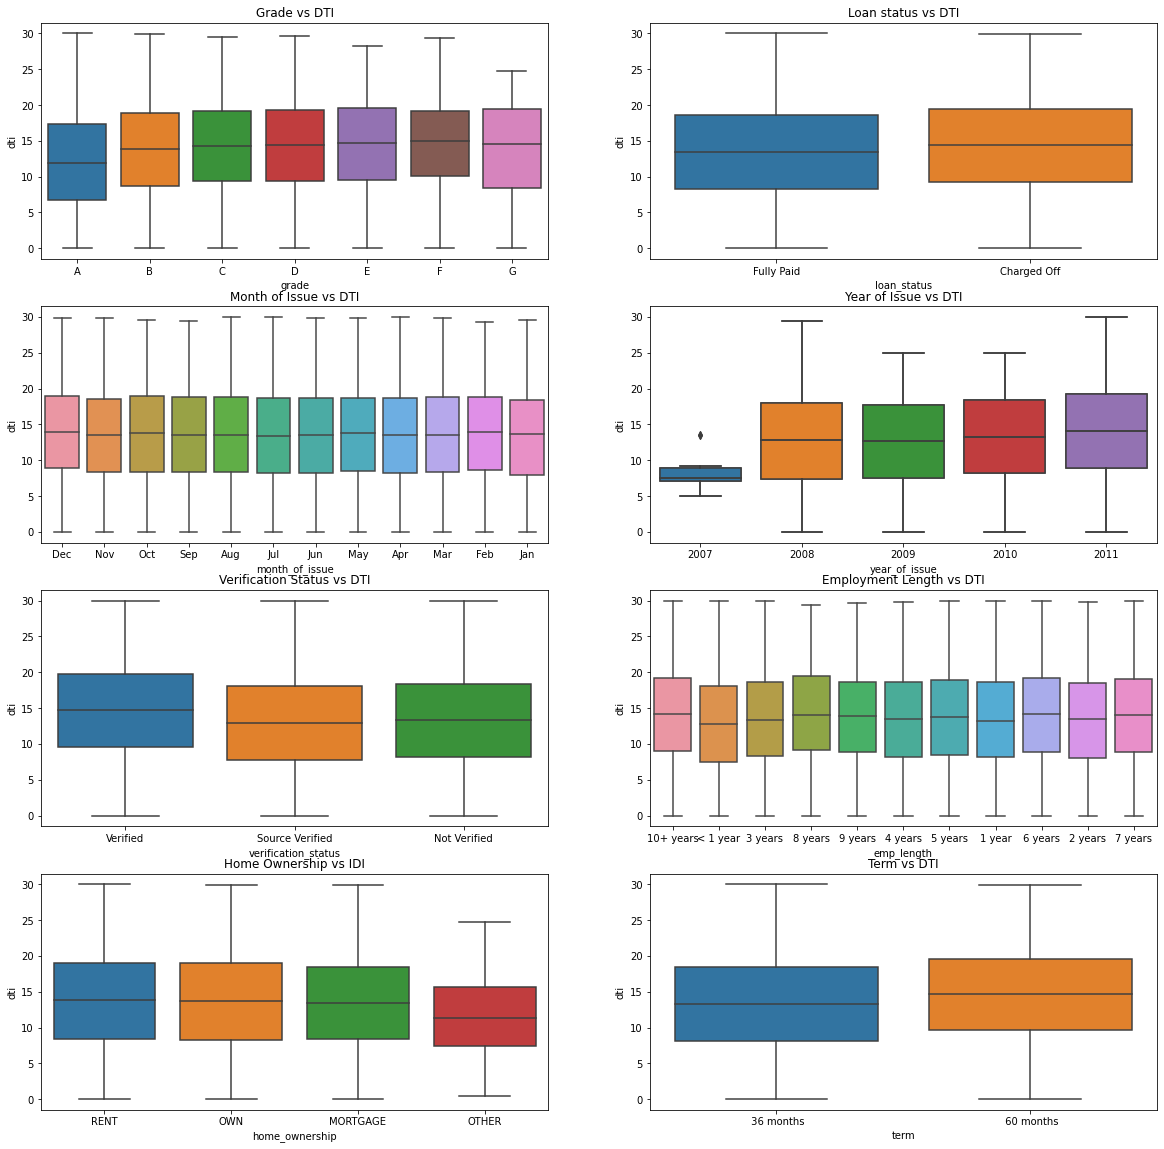

In [65]:
#comparing grade with the DTI
#arranging grade in alphabetically ascending order
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
grade_unique = loan["grade"].unique()
grade_unique.sort()
sns.boxplot(x="grade", y="dti", order = grade_unique, data=loan)
plt.title("Grade vs DTI")

#comparing loan status with the interest rate
plt.subplot(4,2,2)
sns.boxplot(x="loan_status", y="dti", data=loan)
plt.title("Loan status vs DTI")

#comparing month of Issue with the interest rate
plt.subplot(4,2,3)
sns.boxplot(x="month_of_issue", y="dti", data=loan)
plt.title("Month of Issue vs DTI")

#comparing year of Issue with the interest rate
plt.subplot(4,2,4)
sns.boxplot(x="year_of_issue", y="dti", data=loan)
plt.title("Year of Issue vs DTI")

#comparing year of Issue with the interest rate
plt.subplot(4,2,4)
sns.boxplot(x="year_of_issue", y="dti", data=loan)
plt.title("Year of Issue vs DTI")

#comparing verification status with the interest rate
plt.subplot(4,2,5)
sns.boxplot(x="verification_status", y="dti", data=loan)
plt.title("Verification Status vs DTI")

#comparing employment length with the interest rate
plt.subplot(4,2,6)
sns.boxplot(x="emp_length", y="dti", data=loan)
plt.title("Employment Length vs DTI")

#comparing home ownership with the interest rate
plt.subplot(4,2,7)
sns.boxplot(x="home_ownership", y="dti", data=loan)
plt.title("Home Ownership vs IDI")

#comparing term with the interest rate
plt.subplot(4,2,8)
sns.boxplot(x="term", y="dti", data=loan)
plt.title("Term vs DTI")

plt.show()

__OBSERVATIONS:__<br>
    - The borrower with 60 months tenure has higher DTI.<br>
    - The verified borrowers have higher DTI.<br>
    - The charger off borrowers have higher DTI. <br>
    - DTI Ratio increases as the grade decreases. <br>
    - Employee length does not affect DTI. <br>
    - Borrower with rent and own house ownership have higher DTI.<br>
    - Month does not have any effect on the DTI.<br>
    - DTI increases gradually with the years.

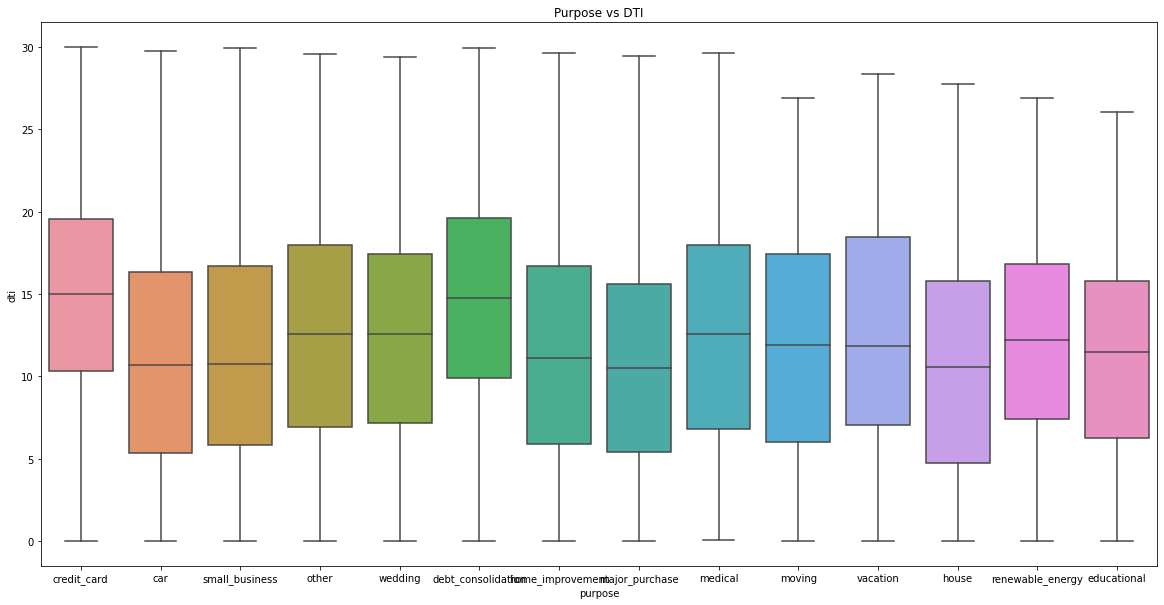

In [66]:
plt.figure(figsize=(20,10))
sns.boxplot(x="purpose", y="dti", data=loan)
plt.title("Purpose vs DTI")
plt.show()

__OBSERVATION:__<br>
Debt consolidation, credit card and vacation have higher DTI.

## Multivariate Analysis

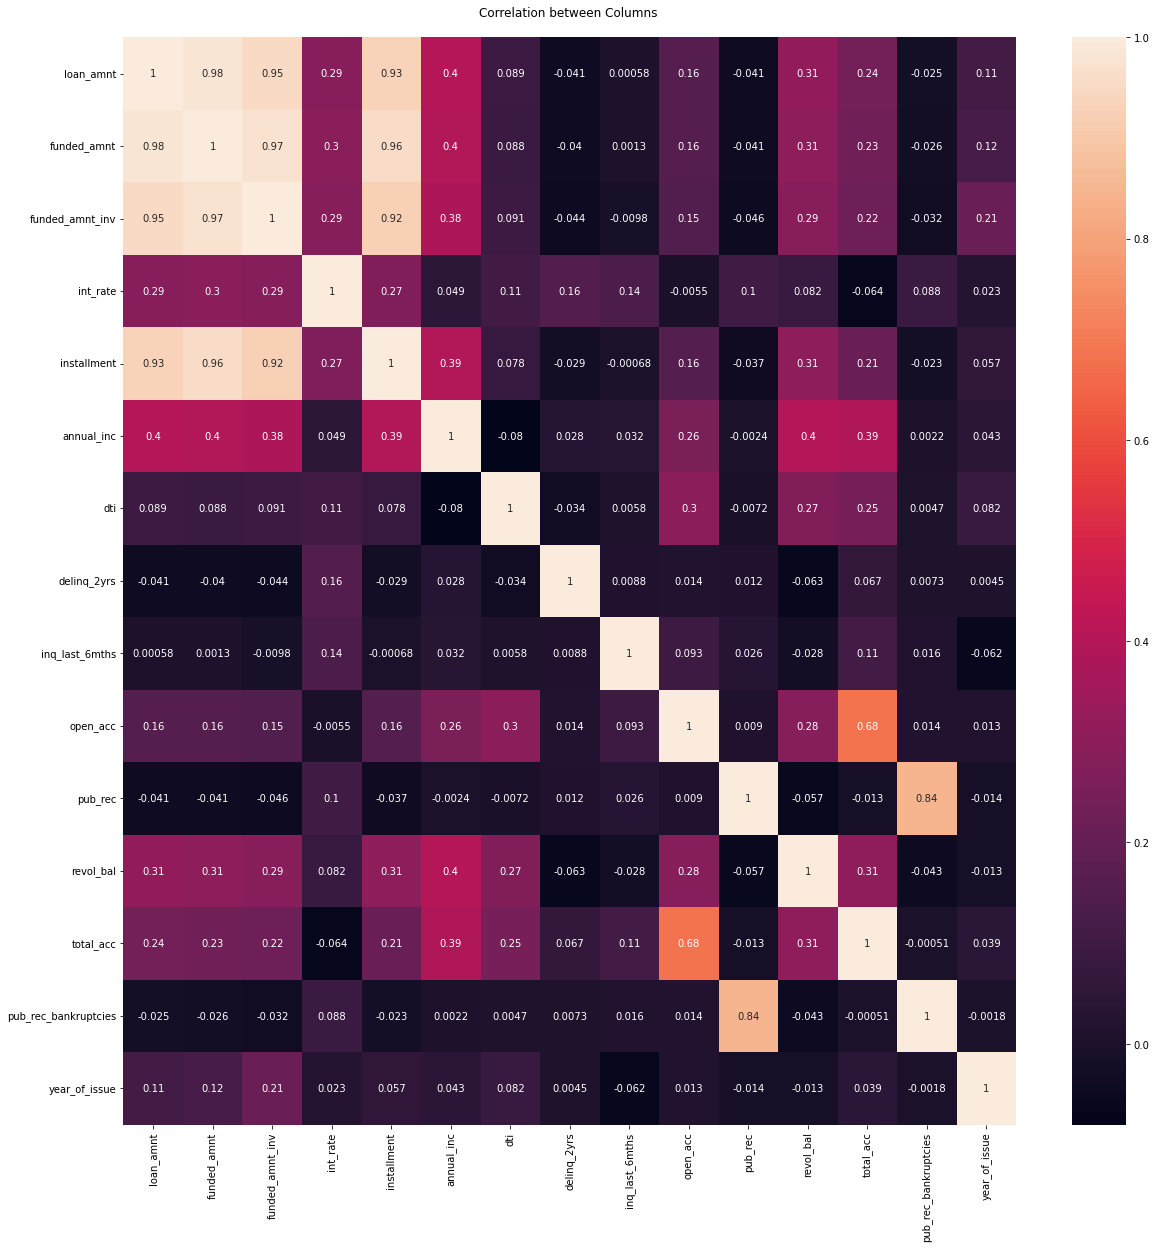

In [67]:
# We would try to find correlation between columns using a cluster map
plt.figure(figsize=(20,20))
sns.heatmap(data = loan.corr(), annot = True)
plt.title("Correlation between Columns \n")
plt.show()

__OBSERVATIONS:__<br>
    - Interest Rate and total account balance is negatively correlated.<br>
    - installment, funded_amnt, funded_amnt_inv and loan amount are highly correlated.<br>
    - DTI and Annual Income are correlated negatively.<br>
    - So, if Annual_inc is low, the debt is high.
    

## Recommentations:

__From above analysis we can say that, there is a high probability of defaulting the loan when:__<br>
    1. The borrower belongs to a lower grade, like F or G; and especially the subgrade F5, G3, G5.<br>
    2. The loan amount is in the range 0 to 21000.<br>
    3. The annual income of borrower is between 30000 and 60000.<br>
    4. The borrower has a rented home and the loan is for the purpose of debt consolidation.<br>
    5. The loan period is of 60 months and the loan status is 'verified'.<br>
    6. The interest rate is in the range 15-20%.<br>
    7. The purpose of the loan is small business.